In [35]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
import statsmodels.api as sm
from matplotlib import pyplot
import pandas as pd
import numpy as np

# 3.7 Exercises

## Conceptual

### Question 1
Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.

|                | Coefficient | Std. Error | t-statistic | p-value  |
|----------------|-------------|------------|-------------|----------|
| **Intercept**  | 2.939       | 0.3119     | 9.42        | < 0.0001 |
| **TV**         | 0.046       | 0.0014     | 32.81       | < 0.0001 |
| **Radio**      | 0.189       | 0.0086     | 21.89       | < 0.0001 |
| **Newspaper**  | -0.001      | 0.0059     | -0.18       | 0.8599   |

**TABLE 3.4.** *For the Advertising data, least squares coefficient estimates of the multiple linear regression of number of units sold on TV, radio, and newspaper advertising budgets.*

Based on the p-values, we can conclude that tv and radio both have a strong association with the number of units sold (due to the p-value close to 0), while newspaper advertising budget is not correlated with units sold. 

--- 

### Question 2

Carefully explain the differences between the KNN classifier and KNN regression methods.

*unanswered*

---

### Question 3

Suppose we have a data set with five predictors, $X_1 = \text{GPA}$, $X_2 = \text{IQ}$, $X_3 = \text{Level (1 for College and 0 for High School)}$, $X_4 = \text{Interaction between GPA and IQ}$, and $X_5 = \text{Interaction between GPA and Level}$. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta}_0 = 50$, $\hat{\beta}_1 = 20$, $\hat{\beta}_2 = 0.07$, $\hat{\beta}_3 = 35$, $\hat{\beta}_4 = 0.01$, $\hat{\beta}_5 = -10$.

#### Question 3a
(a) Which answer is correct, and why?

- i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.
- ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.
- iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.
- iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.

Option iv is correct. Examining the estimated model coefficients, we see that $\hat{\beta}_3 = 35$ meaning when all other terms are held constant, a college student will earn \$35,000 more than a high school student. The $\hat{\beta}_5 = -10$ means that the effect of GPA on salary when a student is in college vs high school is about -10,000, meaning that for college students, the effect of one increase point 

#### Question 3b
Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

$(20 * 4.0) + (110 * 0.07) + (35 * 1) + (4.0 * 1 * 0.01) + (4.0 * 1 * -10) = 82.74 $

#### Question 3c
True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.



---


### Question 4

#### Question 4a

Since the cubic regression is more flexible, it will more closely match the training data when compared to the linear regression.

#### Question 4b

Since the true relationship is linear, the linear regression will likely better fit the new test data points. The cubic regression, due to its flexibility, would have overfit the training data leading to higher residuals for the test data. 

#### Question 4c

For the same reason as in part a, the cubic regression's flexibility will lead it to better fit the training data compared to the linear regression. 

#### Question 4d

For the test data, if the real world relationship is cubic, there is the potential for the cubic regression to more closely model the data. However, since the cubic regression is also more prone to overfitting, depending on the real world relationships, the linear regression may have lower residuals. 


**Takeaways:**
- the higher order polynomial terms in cubic (and higher) regressions lead to more flexibility (and ability to hit more training data points)
  - when a model's complexity is higher than the real world relationship, it leads to overfitting as it starts to tune to the noise in the training data
  - usually means that higher order polynomials will better fit the training data, but the overfitting will lead to worse residuals in the test data

---

### Question 5

*unanswered*

---

### Question 6

Using the $\hat{\beta}_0$ minimizer ($\hat{\beta}_0 = \overline{y}-\hat{\beta}_1\hat{x})$, we can substitute $\overline{x}$ for $x$ in the linear regression equation $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x$.

$$
\begin{align*}
\hat{y} &= \hat{\beta}_0 + \hat{\beta}_1 * \hat{x} \\
        &= (\overline{y} - \hat{\beta}_1\hat{x}) + \hat{\beta}_1\hat{x} \\
        &= \overline{y} - \hat{\beta}_1\hat{x} + \hat{\beta}_1\hat{x} \\
\hat{y} &= \overline{y} \\
\end{align*}
$$

Therefore, when $x =\overline{x}$, $y=\overline{y}$.

---

## Applied

### Question 8

#### Part A

In [3]:
Auto = load_data('Auto')

In [27]:
# fit regression model to data
X = MS(['horsepower']).fit_transform(Auto)
y = Auto['mpg']
model1 = sm.OLS(y, X) # ordinary least squares
results1 = model1.fit()

summarize(results1)

1.2203615961049796e-187

In [30]:
horsepower = 98

q8_beta_0 = results1.params['intercept']
q8_beta_1 = results1.params['horsepower']
q8_beta_1_se = results1.bse['horsepower']

predicted_mpg = q8_beta_0 + q8_beta_1 * horsepower
conf_int = (q8_beta_1 - 2 * q8_beta_1_se, q8_beta_1 + 2 * q8_beta_1_se)

print(
    f"predicted mpg - {predicted_mpg}\n",
    f"95% confidence interval - {conf_int}\n",
)

predicted mpg - 24.467077152512427
 95% confidence interval - (-0.17073573438902367, -0.14495373231828357)



i. Since the p-value associated with horsepower is 0.0 (which is less than some threshold 0.01 or 0.05), we are able to reject the null hypothesis that there is no relationship between horsepower and mpg -- meaning, horsepower is statistically significant in predicting mpg. 

ii. Since the $\hat{\beta}_1$ value is fairly small, but the standard error is smaller, we can assume that $\hat{\beta}_1$ is sufficiently far enough from $0$ to have a valid correlation. To verify this, we can use the "p-value" which is a measure of the probability that a value $|t|$ exists. Since this value is less than $1\%$, we can assume that there is a strong correlation between the data. 

iii. There is a negative relationship between the predictor and the response, since the $\hat{\beta}_1 < 0$. 

iv. The estimated value is is 24.46. The 95% confidence interval is [-0.1698, -0.1458]. *I'm not sure how to calculate the prediction value*

#### Part B

<Axes: title={'center': 'mpg vs. horsepower with regression line'}, xlabel='horsepower', ylabel='mpg'>

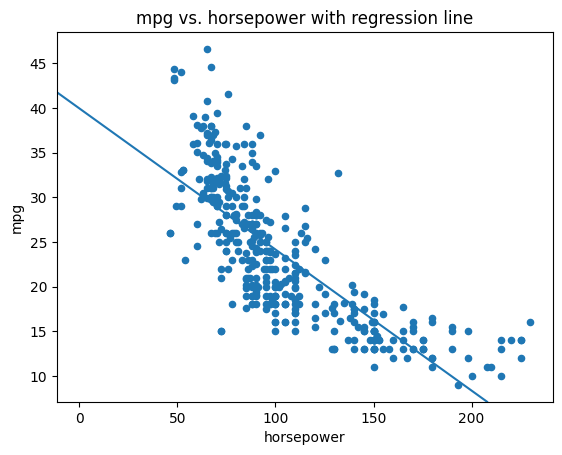

In [31]:
# create figure and plot
_, ax = pyplot.subplots()
ax.set_title('mpg vs. horsepower with regression line')
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

# plot regression line
ax.axline(xy1=(0, q8_beta_0), slope=q8_beta_1)

# plot data as scatter plot
Auto.plot.scatter(x='horsepower', y='mpg', ax=ax)


#### Part C

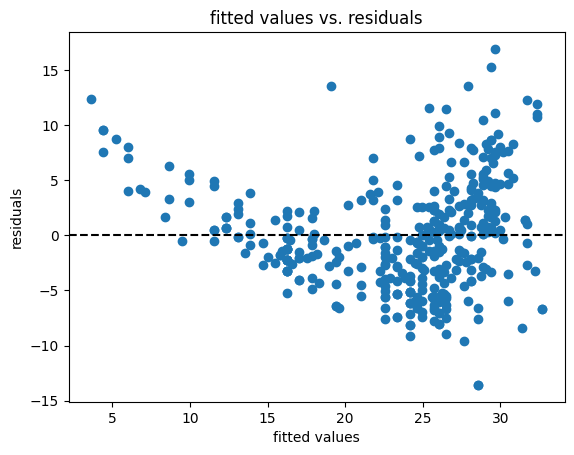

In [34]:
# create figure and plot
_, ax = pyplot.subplots()
ax.set_title('fitted values vs. residuals')
ax.set_xlabel('fitted values')
ax.set_ylabel('residuals')

# plot fitted values against residuals

ax.scatter(results1.fittedvalues, results1.resid)

# plot horizontal line at 0
ax.axhline(0, color='black', linestyle='--');

The fitted values vs. residuals graph above shows a slight curved pattern relative to the horizontal line at 0. This pattern suggests that there is some pattern in the underlying data that is not accurately represented by our regression. 
- there is a slight funnel shape depicted on the scatter plot, this indicates *heteroscedasticity*.
- non-constant variance -- residuals appear to increase in magnitude as the fitted values increase
  - we should apply a concave function such as $log(Y)$ or $\sqrt(Y)$ to solve this problem

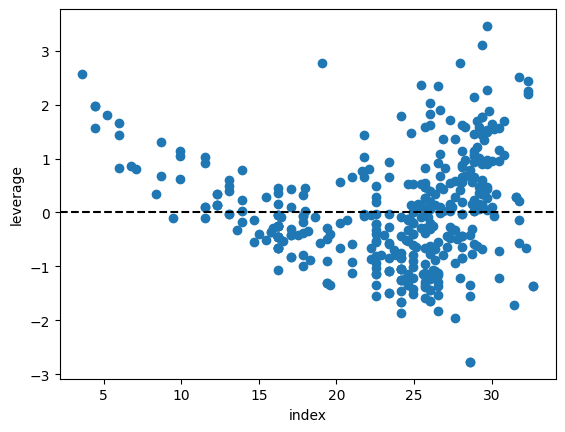

In [39]:
# set up graph and axes labels
ax = pyplot.subplots()[1]
ax.set_xlabel('index')
ax.set_ylabel('leverage')

studentized_resids = results1.get_influence().resid_studentized_internal
ax.scatter(results1.fittedvalues, studentized_resids)
ax.axhline(0, color='black', linestyle='--');